# Handle dataset

In [1]:
!pip install git+https://github.com/howtodie123/Dataloader_for_Smartbin.git

  Cloning https://github.com/howtodie123/Dataloader_for_Smartbin.git to /tmp/pip-req-build-2ls4zicj
  Running command git clone --filter=blob:none --quiet https://github.com/howtodie123/Dataloader_for_Smartbin.git /tmp/pip-req-build-2ls4zicj
  Resolved https://github.com/howtodie123/Dataloader_for_Smartbin.git to commit 894c42d27c77968a998900cdc90faa59b421b7d5
  Preparing metadata (setup.py) ... done
  Created wheel for dataloader: filename=dataloader-1.0-py3-none-any.whl size=4361 sha256=377c4accf1349264fe95c05f761e32902f323475eb10ffe7de527075ac618c5b
  Stored in directory: /tmp/pip-ephem-wheel-cache-dvzri7wd/wheels/40/a2/1e/e885704763508beb91ef1273e2b2fce058cf8af60284b26b02
Successfully built dataloader


In [2]:
from Dataloader import Dataset

In [3]:
list_data = Dataset.list_of_dataset()

['Bag_Classes', 'Bag4Classes', 'Data_real', 'dataset_capstone_9', 'Drinking_waste_classification', 'Garbage_classification_2', 'garbage_classification_3', 'Garbage_classification_dataset', 'Garbage_classification_enhanced', 'garbage_dataset', 'garbage1_dataset', 'trash_dataset', 'trashify-image-dataset', 'TrashType_Image_Dataset', 'waste_dataset']


In [4]:
selected_datasets = [              # Array for download dataset
    'garbage_classification_3',
    'Garbage_classification_2'
]
download_dir = '/content/Dataset' # folder for download dataset file zip
extract_dir = '/content/data' # folder for extract dataset
Download = Dataset.download_and_extract_zips(selected_datasets, download_dir,extract_dir)  # Download dataset




42844854/42844854 [==============================] - 80s 2us/step
Dataset extracted to: /content/data/garbage_classification_3
Dataset extracted to: /content/data/Garbage_classification_2


In [5]:
train_images, val_images, test_images = Dataset.load_dataset('/content/data/Garbage_classification_2')

Found 1617 validated image filenames belonging to 6 classes.
Found 404 validated image filenames belonging to 6 classes.
Found 506 validated image filenames belonging to 6 classes.


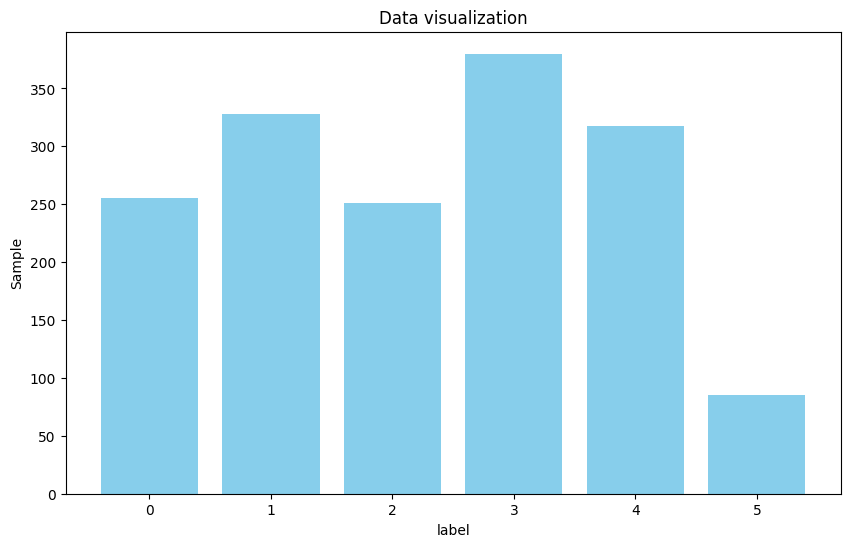

In [6]:
Dataset.Data_visualization(train_images)

In [7]:
Dataset.Data_info(train_images)

Class indices: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
Image shape: (224, 224, 3)
Batch size: 32
Total samples: 1617
Seed: 42
Class mode: categorical
Shuffle: True
Target size: (224, 224)
Color mode: rgb


# Training Model

In [8]:
# Import Data Science Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


# System libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
model = models.Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3))),
model.add(BatchNormalization()),
model.add(MaxPooling2D(2, 2)),
model.add(Conv2D(512, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2)),
model.add(Conv2D(1024, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2)),
model.add(Conv2D(1024, (3,3), activation='relu')),
model.add(Dropout(0.2)),
model.add(MaxPooling2D(2,2)),
model.add(Conv2D(512, (3,3), activation='relu')),
model.add(BatchNormalization()),
model.add(MaxPooling2D(2,2)),
model.add(Flatten()),
model.add(Dense(256, activation='relu')),
model.add(BatchNormalization()),
model.add(Dense(6, activation='softmax'))

In [10]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(train_images,steps_per_epoch=len(train_images),epochs=1,validation_data=val_images,validation_steps=len(val_images))

51/51 [==============================] - 5129s 100s/step - loss: 1.6980 - accuracy: 0.3983 - val_loss: 6.6926 - val_accuracy: 0.2896


In [11]:
test_images.reset()
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_images.classes
class_labels = list(test_images.class_indices.keys())

16/16 [==============================] - 468s 29s/step


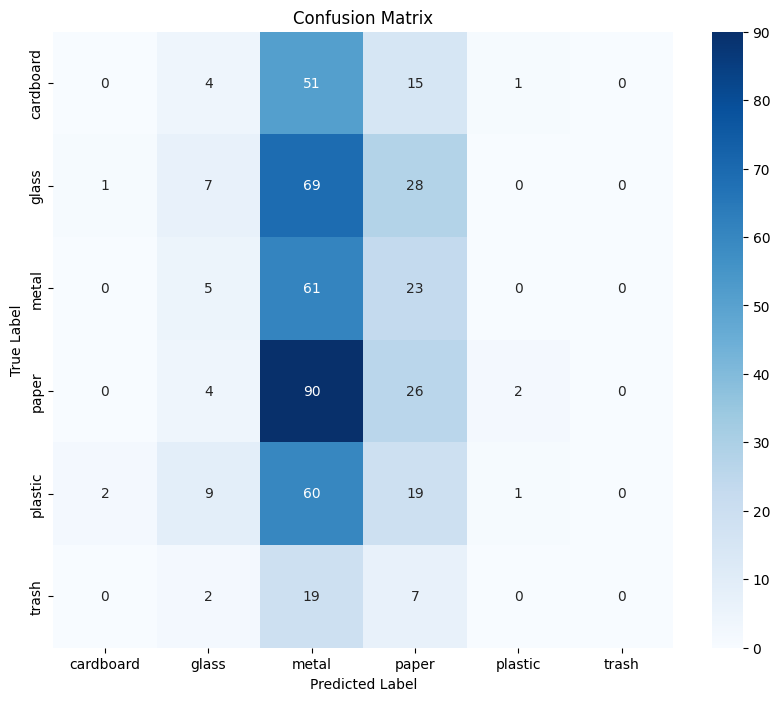

In [13]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
